In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sn

In [14]:
df1=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq='MS'

df2=pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'

In [15]:
from pandas.plotting import lag_plot

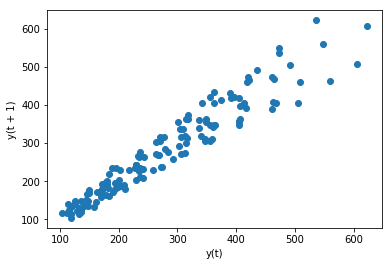

In [16]:
lag_plot(df1['Thousands of Passengers'])

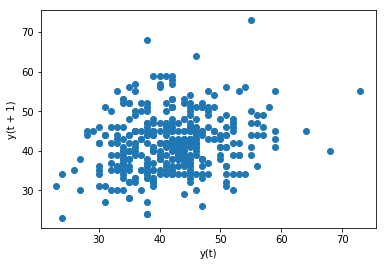

In [17]:
lag_plot(df2['Births'])

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [21]:
acf(df1['Thousands of Passengers'])

c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

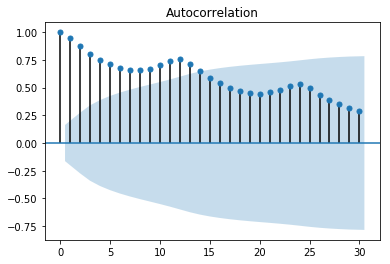

In [46]:
plot_acf(df1['Thousands of Passengers'], lags=30);

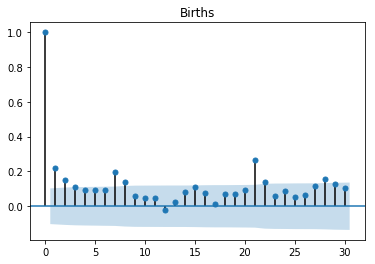

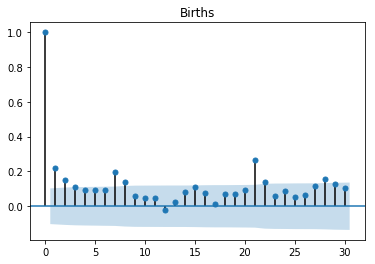

In [27]:
plot_acf(df2, title='Births', lags=40)

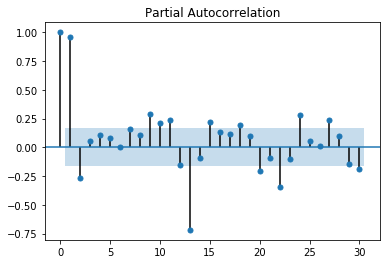

In [24]:
plot_pacf(df1, lags=40);

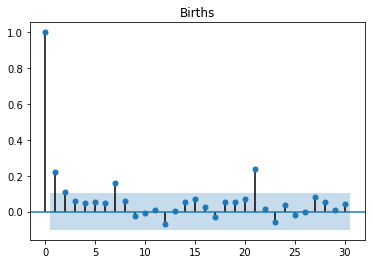

In [25]:
plot_pacf(df2, title='Births', lags=40);

In [28]:
from statsmodels.tsa.statespace.tools import diff

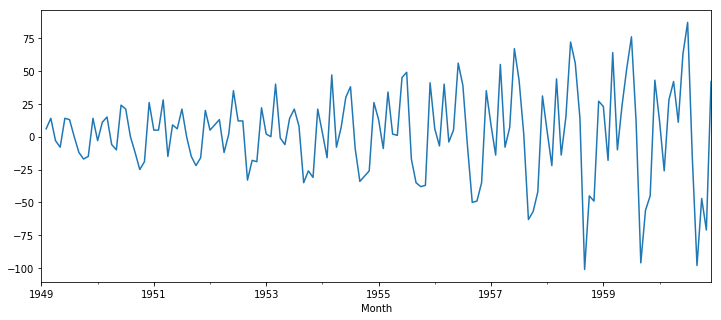

In [35]:
df1['diff1']=diff(df1['Thousands of Passengers'],k_diff=1)
df1['diff1'].plot(figsize=(12,5))

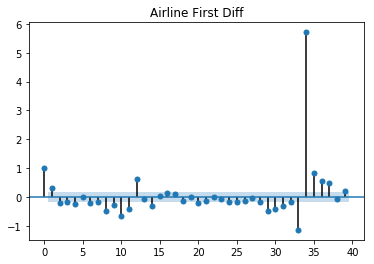

In [39]:
plot_pacf(df1['diff1'].dropna(), title='Airline First Diff', lags=np.arange(40));

### AR1 model
$y(n) = a + b y (n-1) + $noise$(n)$

generalizing:
## AR2:
$y(n) = a+ b_1 y (n-1) + b_2 y (n-2) + $noise$(n)$

In [52]:
from statsmodels.tsa.ar_model import AR, ARResults
df=pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freqs='MS'
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [53]:
df.tail()

,PopEst
DATE,
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077
2018-11-01,328241
2018-12-01,328393


In [54]:
len(df)

96

[Text(0, 0.5, 'Pop'), Text(0.5, 0, '')]

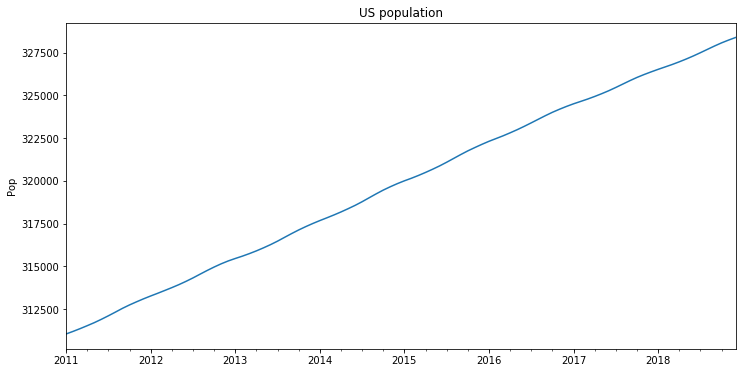

In [55]:
ylabel='Pop'
xlabel=''

ax=df['PopEst'].plot(figsize=(12,6), title='US population')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)

In [60]:
train, test = df.iloc[:84], df.iloc[84:]
model=AR(train['PopEst'])
AR1fit = model.fit(maxlag=1, method='mle') #maximum likelihood estimator
print(f'Lag:{AR1fit.k_ar}\nCoeffs:\n{AR1fit.params}')

Lag:1
Coeffs:
const        147.296808
L1.PopEst      0.999537
dtype: float64


c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [78]:
start=len(train)
end=len(train)+len(test)-1
predictions1=AR1fit.predict(start=start,end=end, dynamic=False).rename('AR(1) Predictions')
predictions1

2018-01-01    326374.208364
2018-02-01    326370.418482
2018-03-01    326366.630356
2018-04-01    326362.843982
2018-05-01    326359.059362
2018-06-01    326355.276494
2018-07-01    326351.495376
2018-08-01    326347.716010
2018-09-01    326343.938392
2018-10-01    326340.162524
2018-11-01    326336.388403
2018-12-01    326332.616030
Freq: MS, Name: AR(1) Predictions, dtype: float64

Predicted: 326374.2084 Actual: 326527 Diff: -152.79163645586232
Predicted: 326370.4185 Actual: 326669 Diff: -298.5815176694887
Predicted: 326366.6304 Actual: 326812 Diff: -445.3696444533998
Predicted: 326362.844  Actual: 326968 Diff: -605.1560176198254
Predicted: 326359.0594 Actual: 327134 Diff: -774.9406379804714
Predicted: 326355.2765 Actual: 327312 Diff: -956.7235063468106
Predicted: 326351.4954 Actual: 327502 Diff: -1150.5046235299087
Predicted: 326347.716  Actual: 327698 Diff: -1350.2839903403656
Predicted: 326343.9384 Actual: 327893 Diff: -1549.06160758849
Predicted: 326340.1625 Actual: 328077 Diff: -1736.8374760842416
Predicted: 326336.3884 Actual: 328241 Diff: -1904.6115966371144
Predicted: 326332.616  Actual: 328393 Diff: -2060.3839700563112


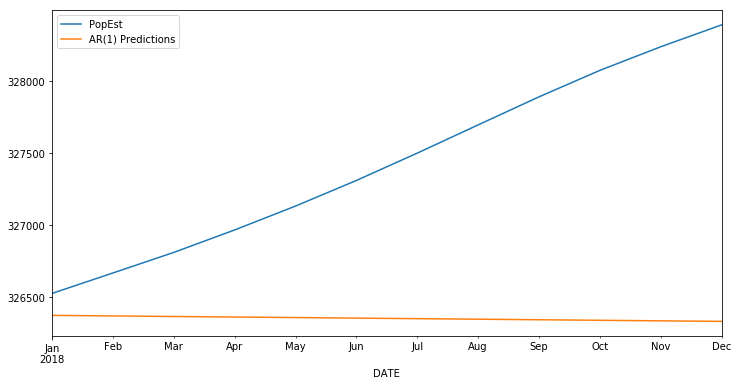

In [77]:
for i in range(len(predictions1)):
    print(f'Predicted: {predictions1[i]:<11.10} Actual: {test["PopEst"][i]} Diff: {predictions1[i]-test["PopEst"][i]}')
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True, figsize=(12,6));

c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECAT

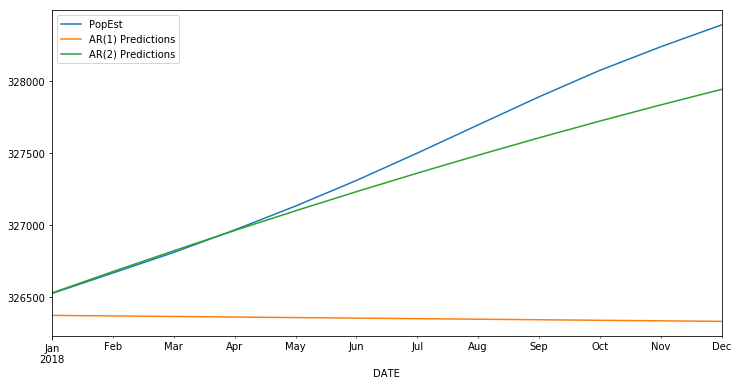

In [82]:
model=AR(train['PopEst'])
AR2fit = model.fit(maxlag=2, method='mle') #maximum likelihood estimator
#print(f'Lag:{AR2fit.k_ar}\nCoeffs:\n{AR2fit.params}')
start=len(train)
end=len(train)+len(test)-1
predictions2=AR2fit.predict(start=start,end=end, dynamic=False).rename('AR(2) Predictions')
#for i in range(len(predictions2)):
#    print(f'Predicted: {predictions1[i]:<11.10} Actual: {test["PopEst"][i]} Diff: {predictions1[i]-test["PopEst"][i]}')
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True);
predictions2.plot(legend=True, figsize=(12,6));

In [84]:
model=AR(train['PopEst'])
ARBestfit=model.fit(method='mle')
print(f'Lag:{ARBestfit.k_ar}\nCoeffs:\n{ARBestfit.params}')

c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Lag:11
Coeffs:
const         96.178185
L1.PopEst      2.310060
L2.PopEst     -2.087646
L3.PopEst      1.401213
L4.PopEst     -1.066483
L5.PopEst      0.743772
L6.PopEst     -0.795203
L7.PopEst      0.703824
L8.PopEst     -0.172876
L9.PopEst      0.187809
L10.PopEst    -0.218017
L11.PopEst    -0.006756
dtype: float64


c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


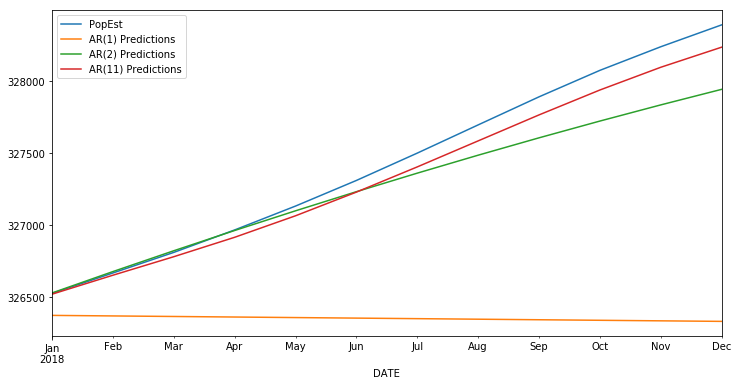

In [87]:
start=len(train)
end=len(train)+len(test)-1
predictionsBest=ARBestfit.predict(start=start,end=end, dynamic=False).rename('AR(11) Predictions')
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictionsBest.plot(legend=True, figsize=(12,6));

In [92]:
from sklearn.metrics import mean_squared_error as msqe
labels=['AR(1)', 'AR(2)', 'AR(11)']
preds=[predictions1, predictions2, predictionsBest]
for i in range(3):
    error=msqe(test['PopEst'],preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1552397.371
AR(2) Error: 53365.21485
AR(11) Error: 9597.423658


### Forecasting

c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


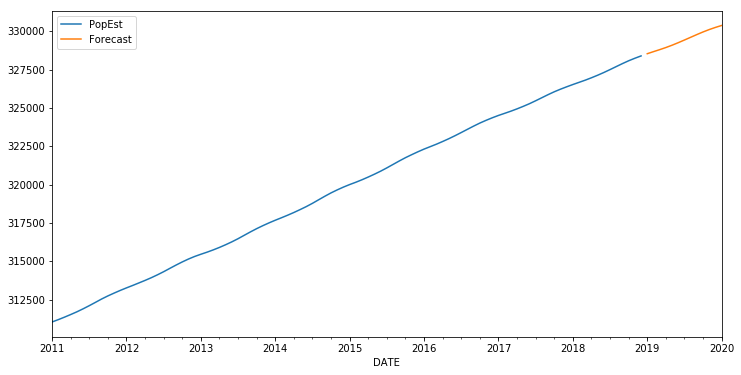

In [95]:
model=AR(df['PopEst'])
ARfit=model.fit(maxlag=11,method='mle')
fcast=ARfit.predict(start=len(df),end=len(df)+12,dynamic=False).rename('Forecast')
df['PopEst'].plot(legend=True)
fcast.plot(legend=True, figsize=(12,6))


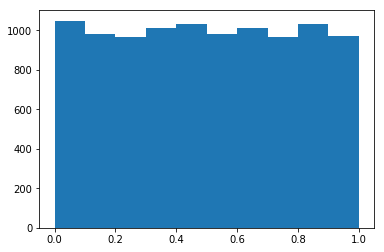

In [108]:
from matplotlib.pyplot import hist
num_samples=10000
num_bins=20
whiteNoise=np.random.random(size=num_samples)
hist(whiteNoise)
wn=whiteNoise

1. Generate AR(n) models for n=1..5 with arbitrary parameters. 
1. Calculate pacf for each n
1. Use AR model on the generated data


### Model: 
$y(n) = 2 + .8y(n-1) - .5y(n-2) + .3y(n-3) - .2y(n-4) + .1y(n-5) + $noise$(n)$ 

$y(0) = 2$

AR(0)
Lag:1
Coeffs: [1.37145612 0.71726753]
AR(1)
Lag:2
Coeffs: [ 1.6048552   0.79441536 -0.12433124]
AR(2)
Lag:3
Coeffs: [ 0.9435977   0.82449735 -0.3566103   0.33668756]
AR(3)
Lag:4
Coeffs: [ 0.86482978  0.81168158 -0.34272241  0.29849723  0.05315393]
AR(4)
Lag:5
Coeffs: [ 0.71059087  0.81510939 -0.36938717  0.32564959 -0.01635599  0.09703991]


c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


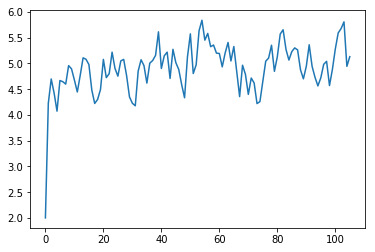

In [153]:
import matplotlib.pyplot as plt
wn = np.random.random
params = [2, .8, -.5, .3, -.2, .1]
y = [2]
y.append(params[0]+params[1]*y[0]+wn())
y.append(params[0]+params[1]*y[1]+params[2]*y[0]+wn())
y.append(params[0]+params[1]*y[2]+params[2]*y[1]+params[3]*y[0]+wn())
y.append(params[0]+params[1]*y[3]+params[2]*y[2]+params[3]*y[1]+params[4]*y[0]+wn())
y.append(params[0]+params[1]*y[4]+params[2]*y[3]+params[3]*y[2]+params[4]*y[1]+params[5]*y[0]+wn())
for i in range(100):
    tail = len(y)
    y.append(params[0]
             +params[1]*y[tail-1]
             +params[2]*y[tail-2]
             +params[3]*y[tail-3]
             +params[4]*y[tail-4]
             +params[5]*y[tail-5] + wn())
plt.plot(y)

models = []
for i in range(1,6):
    model=AR(y)
    ARfit=model.fit(maxlag=i, method='mle')
    models.append(ARfit)

for i in range(5):
    print(f'================================================\nAR({i})')
    print(f'Lag:{models[i].k_ar}\nCoeffs: {models[i].params}\n================================================')